In [1]:
import pandas as pd

df = pd.read_csv('ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [2]:
movies_df = pd.read_csv('movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df = pd.merge(df, movies_df, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy


In [4]:
df.describe()

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


In [5]:
rating_df = pd.DataFrame(df.groupby('title')['rating'].mean())
rating_df.head()

,rating
title,
"""Great Performances"" Cats (1998)",2.748387
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667
$ (Dollars) (1971),2.833333
$5 a Day (2008),2.871795
$9.99 (2008),3.009091


In [6]:
rating_df['count'] = df.groupby('title')['rating'].count()
rating_df.head()

,rating,count
title,,
"""Great Performances"" Cats (1998)",2.748387,155
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667,3
$ (Dollars) (1971),2.833333,24
$5 a Day (2008),2.871795,39
$9.99 (2008),3.009091,55


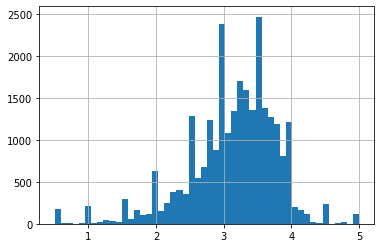

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
rating_df['rating'].hist(bins=50)

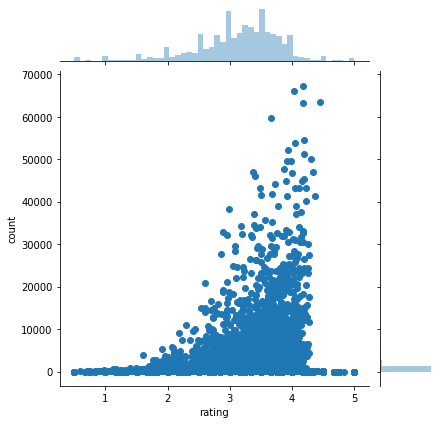

In [8]:
import seaborn as sns
sns.jointplot(x='rating', y='count', data=rating_df)

In [9]:
df.shape

(20000263, 6)

In [10]:
data = df.iloc[:1000000, :]
movie_matrix= data.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
movie_matrix.head(10)

title,2001: A Space Odyssey (1968),Blade Runner (1982),"City of Lost Children, The (Cité des enfants perdus, La) (1995)",Clerks (1994),Die Hard (1988),Dragonheart (1996),E.T. the Extra-Terrestrial (1982),Escape to Witch Mountain (1975),"Fish Called Wanda, A (1988)",Interview with the Vampire: The Vampire Chronicles (1994),...,Seven (a.k.a. Se7en) (1995),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Terminator 2: Judgment Day (1991),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)",What's Eating Gilbert Grape (1993),"Wizard of Oz, The (1939)"
userId,,,,,,,,,,,,,,,,,,,,,
1,3.5,4.0,3.5,4.0,4.0,3.0,4.0,3.5,4.0,4.0,...,3.5,4.0,3.5,4.0,4.5,3.5,3.5,3.5,3.5,3.5
2,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN
3,5.0,5.0,NaN,5.0,NaN,NaN,5.0,NaN,4.0,NaN,...,NaN,5.0,5.0,5.0,5.0,4.0,4.0,5.0,3.0,4.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,5.0,NaN,...,NaN,5.0,3.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,5.0,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN


In [11]:
rating_df.sort_values('count', ascending=False).head(10)

,rating,count
title,,
Pulp Fiction (1994),4.174231,67310
Forrest Gump (1994),4.029000,66172
"Shawshank Redemption, The (1994)",4.446990,63366
"Silence of the Lambs, The (1991)",4.177057,63299
Jurassic Park (1993),3.664741,59715
Star Wars: Episode IV - A New Hope (1977),4.190672,54502
Braveheart (1995),4.042534,53769
Terminator 2: Judgment Day (1991),3.931954,52244
"Matrix, The (1999)",4.187186,51334


In [22]:
clerks_user_rating = movie_matrix['Clerks (1994)']
dh_user_rating = movie_matrix['Die Hard (1988)']

clerks_user_rating.head()

userId
1    4.0
2    NaN
3    5.0
4    NaN
5    NaN
Name: Clerks (1994), dtype: float64

In [23]:
dh_user_rating.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    5.0
Name: Die Hard (1988), dtype: float64

In [24]:
similar_to_clerks= movie_matrix.corrwith(clerks_user_rating)
similar_to_clerks.head()

title
2001: A Space Odyssey (1968)                                       0.114148
Blade Runner (1982)                                                0.136823
City of Lost Children, The (Cité des enfants perdus, La) (1995)    0.197742
Clerks (1994)                                                      1.000000
Die Hard (1988)                                                    0.158128
dtype: float64

In [25]:
similar_to_dh= movie_matrix.corrwith(dh_user_rating)
similar_to_dh.head()

title
2001: A Space Odyssey (1968)                                       0.040263
Blade Runner (1982)                                                0.133754
City of Lost Children, The (Cité des enfants perdus, La) (1995)    0.060687
Clerks (1994)                                                      0.158128
Die Hard (1988)                                                    1.000000
dtype: float64

In [26]:
corr_clerks = pd.DataFrame(similar_to_clerks, columns=['Correlation'])
corr_clerks.dropna(inplace=True)
corr_clerks.head()

,Correlation
title,
2001: A Space Odyssey (1968),0.114148
Blade Runner (1982),0.136823
"City of Lost Children, The (Cité des enfants perdus, La) (1995)",0.197742
Clerks (1994),1.000000
Die Hard (1988),0.158128


In [27]:
corr_dh = pd.DataFrame(similar_to_dh, columns=['correlation'])
corr_dh.dropna(inplace=True)
corr_dh.head()

,correlation
title,
2001: A Space Odyssey (1968),0.040263
Blade Runner (1982),0.133754
"City of Lost Children, The (Cité des enfants perdus, La) (1995)",0.060687
Clerks (1994),0.158128
Die Hard (1988),1.000000


In [28]:
corr_clerks = corr_clerks.join(rating_df['count'])
corr_dh = corr_dh.join(rating_df['count'])

In [29]:
corr_clerks .head()

,Correlation,count
title,,
2001: A Space Odyssey (1968),0.114148,25253
Blade Runner (1982),0.136823,30526
"City of Lost Children, The (Cité des enfants perdus, La) (1995)",0.197742,8520
Clerks (1994),1.000000,23695
Die Hard (1988),0.158128,30399


In [30]:
corr_dh.head()

,correlation,count
title,,
2001: A Space Odyssey (1968),0.040263,25253
Blade Runner (1982),0.133754,30526
"City of Lost Children, The (Cité des enfants perdus, La) (1995)",0.060687,8520
Clerks (1994),0.158128,23695
Die Hard (1988),1.000000,30399


In [31]:
corr_clerks[corr_clerks['count'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,count
title,,
Clerks (1994),1.000000,23695
Reservoir Dogs (1992),0.286784,27635
Pulp Fiction (1994),0.282546,67310
"Usual Suspects, The (1995)",0.250283,47006
Monty Python's Life of Brian (1979),0.224603,20557
Monty Python and the Holy Grail (1975),0.221943,33024
Platoon (1986),0.212188,15808
Léon: The Professional (a.k.a. The Professional) (Léon) (1994),0.211778,25804
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),0.207537,44980


In [32]:
corr_dh[corr_dh['count'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,count
title,,
Die Hard (1988),1.000000,30399
Terminator 2: Judgment Day (1991),0.431830,52244
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),0.404600,43295
Star Wars: Episode V - The Empire Strikes Back (1980),0.297724,45313
Star Wars: Episode IV - A New Hope (1977),0.284342,54502
"Mask, The (1994)",0.276308,34384
Platoon (1986),0.251667,15808
"Silence of the Lambs, The (1991)",0.245098,63299
E.T. the Extra-Terrestrial (1982),0.234757,32685
